# Corrosion Detection

# Project Overview
The  project applies deep learning and computer vision techniques to the problem of corrosion detection . Corrosion is one of the most critical challenges in offshore energy infrastructure, often leading to costly maintenance and potential environmental risks. Traditional inspection methods rely on manual image analysis, which can be time-consuming and prone to human error.

To address this, a Convolutional Neural Network (CNN), a type of deep learning model widely used in computer vision is trained to automatically classify inspection images as positive (corroded) or negative (non-corroded).

In [2]:
from google.colab import files
uploaded = files.upload()


Saving corrosion.zip to corrosion.zip


In [3]:

# Unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("corrosion.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

# Walk through  directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/data'.
There are 2 directories and 0 images in 'data/data/underwater'.
There are 0 directories and 27 images in 'data/data/underwater/Positive'.
There are 0 directories and 27 images in 'data/data/underwater/Negative'.
There are 2 directories and 0 images in 'data/data/surface'.
There are 2 directories and 0 images in 'data/data/surface/positive'.
There are 0 directories and 222 images in 'data/data/surface/positive/test'.
There are 0 directories and 885 images in 'data/data/surface/positive/train'.
There are 2 directories and 0 images in 'data/data/surface/negative'.
There are 0 directories and 25 images in 'data/data/surface/negative/test'.
There are 0 directories and 100 images in 'data/data/surface/negative/train'.


In [5]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("data/data/surface/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['negative' 'positive']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (720, 1280, 3)


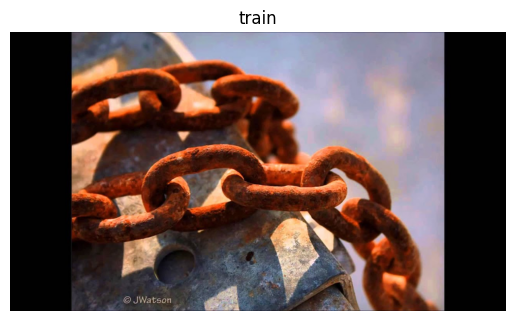

In [7]:
# View a random image from the training dataset
img = view_random_image("data/data/surface/positive/",
                        target_class="train")

In [8]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [9]:
import os
import shutil

base_path = "data/data/surface"

# Create new organised structure
new_train_path = os.path.join(base_path, "train")
new_test_path = os.path.join(base_path, "test")

os.makedirs(new_train_path, exist_ok=True)
os.makedirs(new_test_path, exist_ok=True)

# Moving images to the new structure
for label in ["positive", "negative"]:
    for split in ["train", "test"]:
        src = os.path.join(base_path, label, split)
        dst = os.path.join(base_path, split, label)
        os.makedirs(dst, exist_ok=True)
        for file in os.listdir(src):
            shutil.move(os.path.join(src, file), os.path.join(dst, file))

print("Dataset reorganized successfully!")


Dataset reorganized successfully!


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (getting all of the pixel values between 1 and 0, also called scaling/normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "data/data/surface/train"
test_dir = "data/data/surface/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory( directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 985 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
20/31 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8864 - loss: 0.5043

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.8924 - loss: 0.4702 - val_accuracy: 0.8988 - val_loss: 0.3737
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9119 - loss: 0.3089 - val_accuracy: 0.8907 - val_loss: 0.3378
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9018 - loss: 0.2436 - val_accuracy: 0.9028 - val_loss: 0.2814
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9254 - loss: 0.1955 - val_accuracy: 0.9109 - val_loss: 0.2802
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9461 - loss: 0.1635 - val_accuracy: 0.8704 - val_loss: 0.3030


In [11]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 623ms/step - accuracy: 0.8079 - loss: 0.6545 - val_accuracy: 0.8988 - val_loss: 0.5200
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 565ms/step - accuracy: 0.8976 - loss: 0.4171 - val_accuracy: 0.8988 - val_loss: 0.3074
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 558ms/step - accuracy: 0.8862 - loss: 0.3512 - val_accuracy: 0.8988 - val_loss: 0.2963
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 555ms/step - accuracy: 0.9025 - loss: 0.2902 - val_accuracy: 0.8988 - val_loss: 0.3243
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 573ms/step - accuracy: 0.8787 - loss: 0.3436 - val_accuracy: 0.8988 - val_loss: 0.2624


In [13]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 818ms/step - accuracy: 0.7302 - loss: 5.1063 - val_accuracy: 0.9028 - val_loss: 1.2594
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 777ms/step - accuracy: 0.8359 - loss: 1.2176 - val_accuracy: 0.8988 - val_loss: 2.5276
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 778ms/step - accuracy: 0.8285 - loss: 1.9980 - val_accuracy: 0.7490 - val_loss: 0.9081
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 749ms/step - accuracy: 0.8737 - loss: 0.6396 - val_accuracy: 0.8866 - val_loss: 0.3950
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 775ms/step - accuracy: 0.8500 - loss: 0.7294 - val_accuracy: 0.9028 - val_loss: 0.2963


In [15]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [16]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [17]:
# Create the model
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer
])
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.7760 - loss: 1.7906 - val_accuracy: 0.8988 - val_loss: 0.3749
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9013 - loss: 0.2508 - val_accuracy: 0.8988 - val_loss: 0.3114
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9271 - loss: 0.2171 - val_accuracy: 0.8988 - val_loss: 0.2457
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.9628 - loss: 0.1134 - val_accuracy: 0.8866 - val_loss: 0.2658
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9775 - loss: 0.0688 - val_accuracy: 0.8907 - val_loss: 0.2902


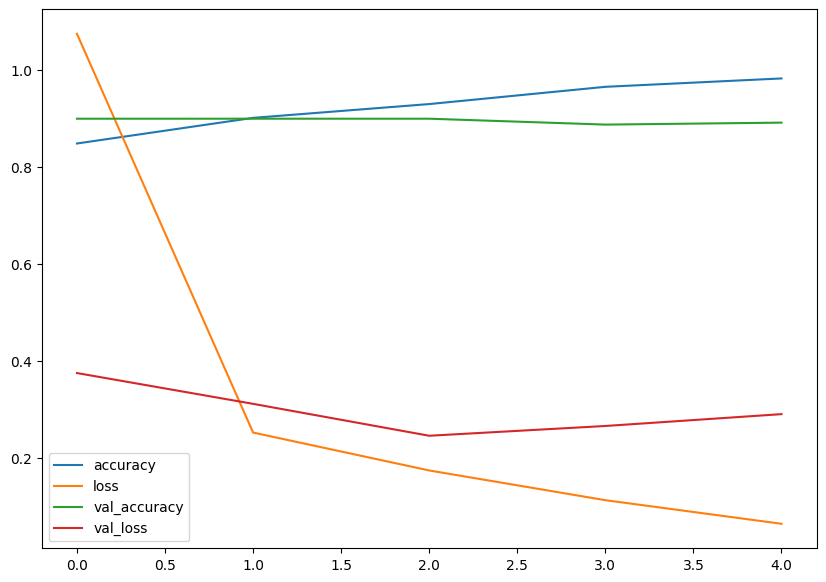

In [18]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [19]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

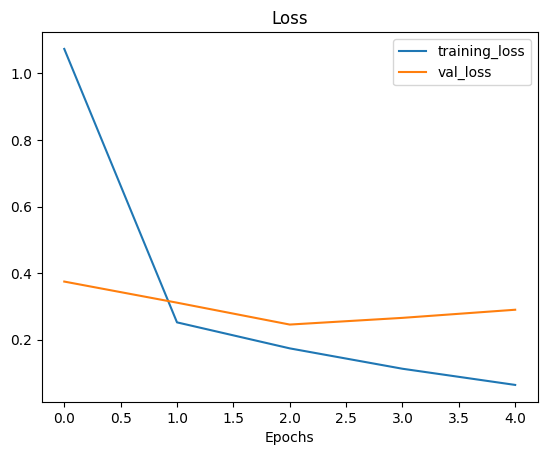

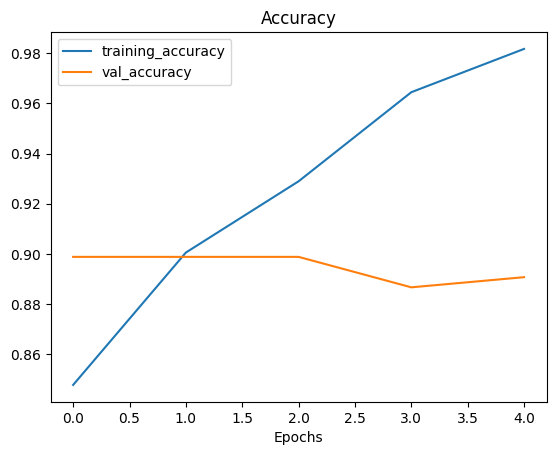

In [20]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [21]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

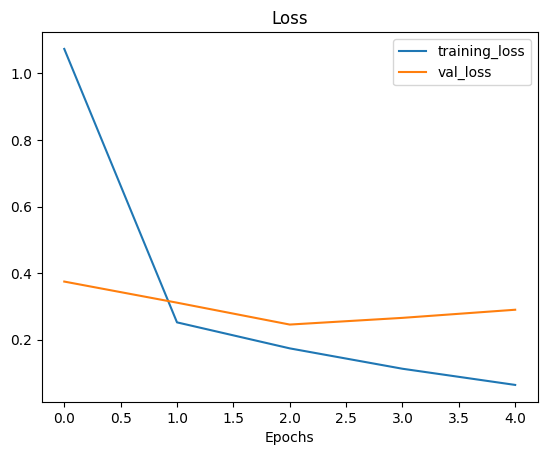

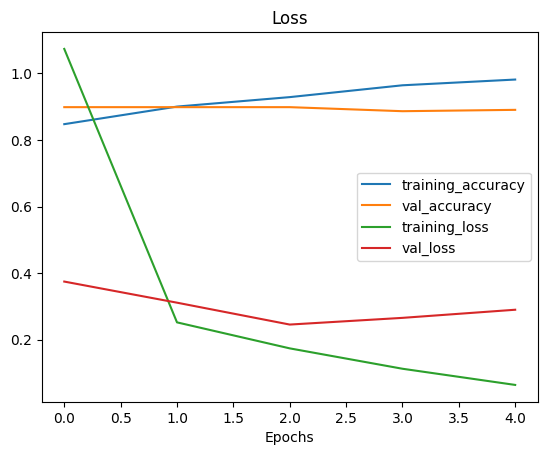

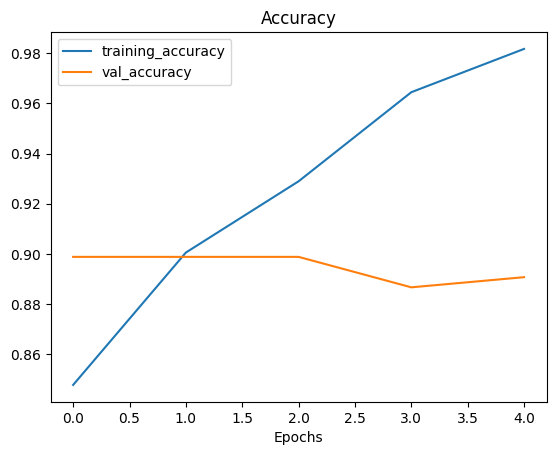

In [22]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)
plot_loss_curves(history_4)

In [23]:
# Create the model
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
 #Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
19/31 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7394 - loss: 0.4692

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7896 - loss: 0.4297 - val_accuracy: 0.8988 - val_loss: 0.3279
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8980 - loss: 0.2853 - val_accuracy: 0.8988 - val_loss: 0.2761
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9136 - loss: 0.2178 - val_accuracy: 0.9109 - val_loss: 0.3255
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9042 - loss: 0.2371 - val_accuracy: 0.9312 - val_loss: 0.2183
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9183 - loss: 0.2110 - val_accuracy: 0.9433 - val_loss: 0.2114


In [24]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

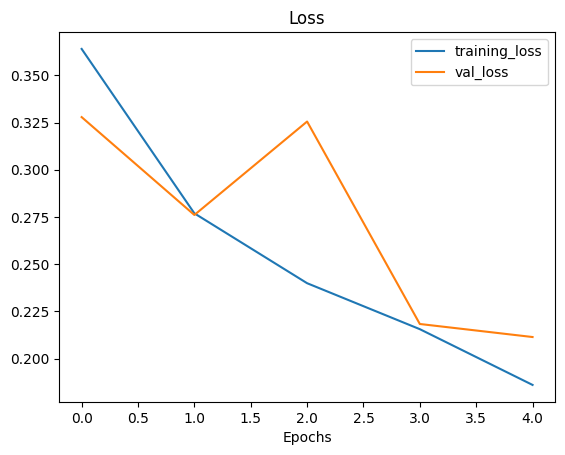

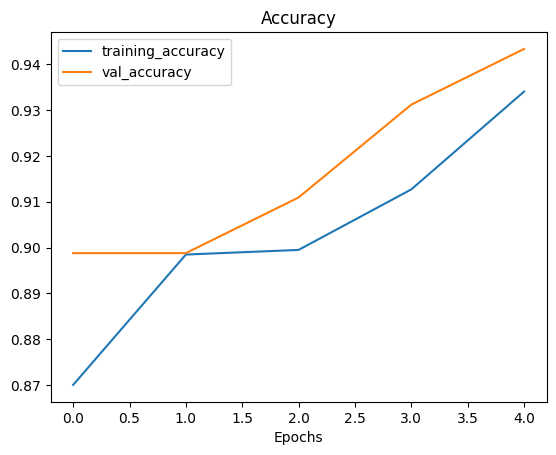

In [25]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [26]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 985 images belonging to 2 classes.
Non-augmented training images:
Found 985 images belonging to 2 classes.
Unchanged test images:
Found 247 images belonging to 2 classes.


In [28]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)


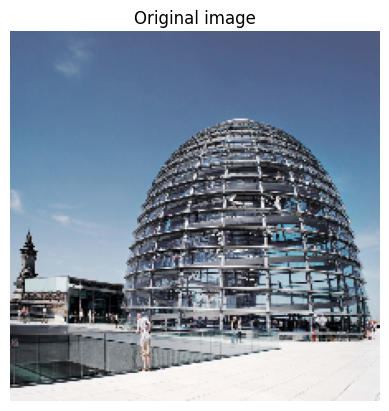

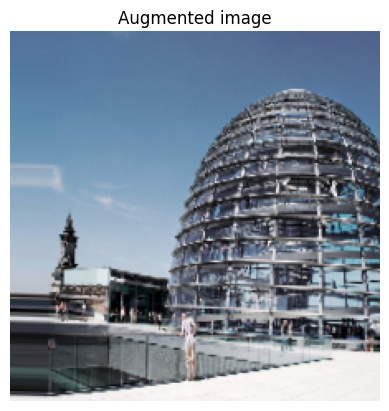

In [29]:
# Show original image and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [30]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8856 - loss: 0.5257 - val_accuracy: 0.8988 - val_loss: 0.3708
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9430 - loss: 0.2479 - val_accuracy: 0.8988 - val_loss: 0.3597
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9375 - loss: 0.2290 - val_accuracy: 0.8988 - val_loss: 0.3040
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9027 - loss: 0.2790 - val_accuracy: 0.8988 - val_loss: 0.3120
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9486 - loss: 0.1822 - val_accuracy: 0.8988 - val_loss: 0.2905


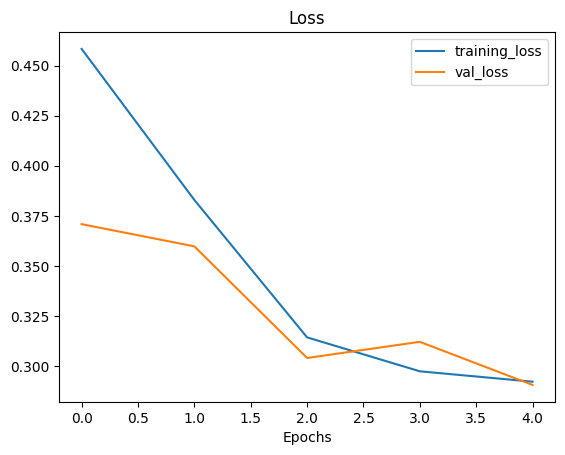

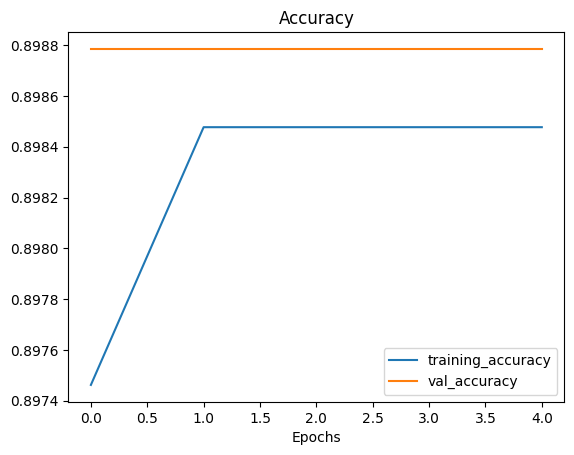

In [31]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [32]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 985 images belonging to 2 classes.


In [33]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8298 - loss: 0.4477 - val_accuracy: 0.8988 - val_loss: 0.3612
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8930 - loss: 0.3357 - val_accuracy: 0.8988 - val_loss: 0.3384
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8939 - loss: 0.2770 - val_accuracy: 0.8988 - val_loss: 0.3048
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8959 - loss: 0.2683 - val_accuracy: 0.8988 - val_loss: 0.2755
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8994 - loss: 0.2330 - val_accuracy: 0.8988 - val_loss: 0.2819


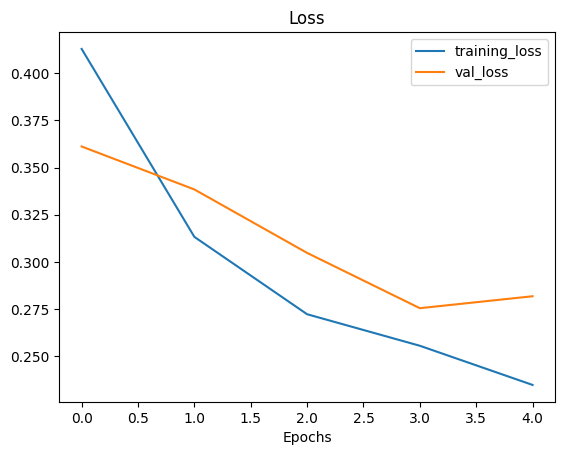

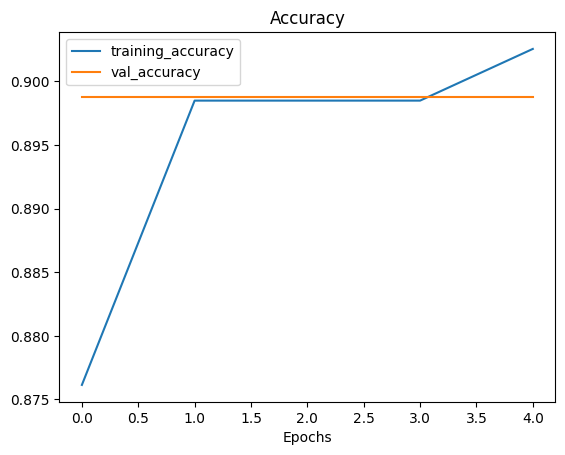

In [34]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [83]:
# Create a CNN model ( reference- https://poloclub.github.io/cnn-explainer/  but for binary classification)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23/31 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7809 - loss: 0.5949

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.8074 - loss: 0.5531 - val_accuracy: 0.5000 - val_loss: 0.8147
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8876 - loss: 0.3624 - val_accuracy: 0.5000 - val_loss: 1.7191
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9011 - loss: 0.2931 - val_accuracy: 0.5000 - val_loss: 0.8654
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8949 - loss: 0.2605 - val_accuracy: 0.5000 - val_loss: 0.7705
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9067 - loss: 0.2227 - val_accuracy: 0.6000 - val_loss: 0.8765
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9254 - loss: 0.2018 - val_accuracy: 0.7000 - val_loss: 0.5338
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9109 - loss: 0.2316 - val_accuracy: 0.6000 - val_loss: 0.7559
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9179 - loss: 0.2160 - val_accuracy: 0.5000 - val_loss: 0.6041

In [36]:
# Check model_8 architecture
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

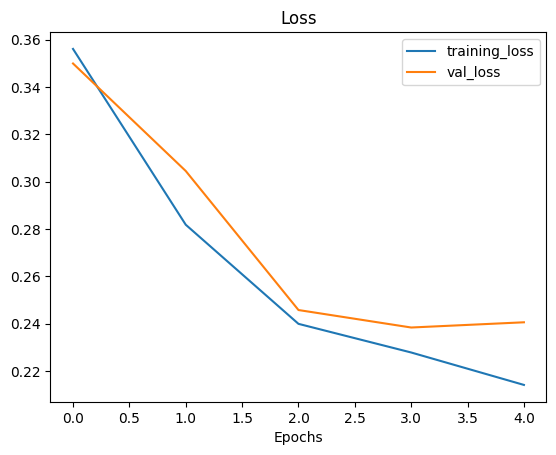

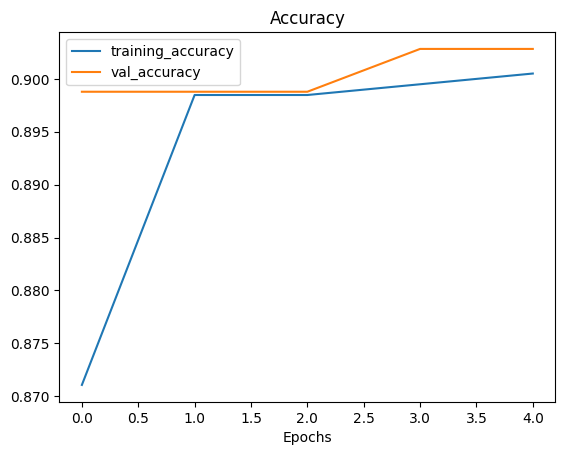

In [37]:
# Check out the  model performance
plot_loss_curves(history_8)

In [38]:

print(class_names)

['negative' 'positive']


In [39]:
from google.colab import files
uploaded1 = files.upload()

Saving image0 (3).jpeg to image0 (3).jpeg


Time to test the model

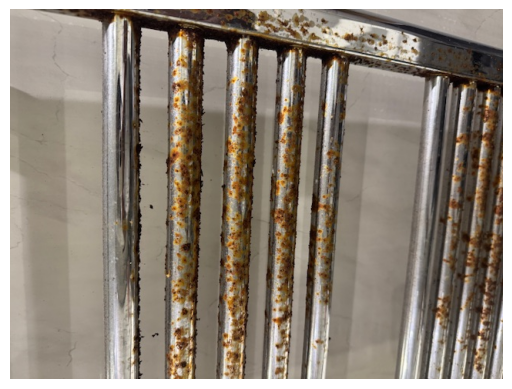

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


filename = list(uploaded1.keys())[0]

# Load and display the image
heating = mpimg.imread(filename)
plt.imshow(heating)
plt.axis(False)
plt.show()


In [43]:
import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels

  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [44]:
# Load in and preprocess our custom image
heating = load_and_prep_image("/content/image0 (3).jpeg")
heating


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.74509805, 0.7137255 , 0.67058825],
        [0.7507003 , 0.71932775, 0.6761905 ],
        [0.73757505, 0.7062025 , 0.66306525],
        ...,
        [0.66694665, 0.6394957 , 0.60028   ],
        [0.6302523 , 0.6028013 , 0.56358564],
        [0.68095255, 0.6535016 , 0.6142859 ]],

       [[0.7478991 , 0.71652657, 0.6733893 ],
        [0.7453381 , 0.71396554, 0.6708283 ],
        [0.7404562 , 0.7090837 , 0.66594636],
        ...,
        [0.6589045 , 0.6314535 , 0.59223783],
        [0.68799514, 0.66054416, 0.6213285 ],
        [0.6892358 , 0.6617848 , 0.62256914]],

       [[0.7417767 , 0.71040416, 0.6672669 ],
        [0.74173665, 0.7103641 , 0.66722685],
        [0.73901564, 0.7076431 , 0.66450584],
        ...,
        [0.6880351 , 0.6605841 , 0.6213684 ],
        [0.67539006, 0.6479391 , 0.6087234 ],
        [0.6766306 , 0.64917964, 0.60996395]],

       ...,

       [[0.6431373 , 0.6117647 , 0.5686275 ],
        [0.67

In [50]:
# Add an extra axis
print(f"Shape before new dimension: {heating.shape}")
heating = tf.expand_dims(heating, axis=0) # add an extra dimension at axis 0

print(f"Shape after new dimension: {heating.shape}")
heating

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.74509805, 0.7137255 , 0.67058825],
         [0.7507003 , 0.71932775, 0.6761905 ],
         [0.73757505, 0.7062025 , 0.66306525],
         ...,
         [0.66694665, 0.6394957 , 0.60028   ],
         [0.6302523 , 0.6028013 , 0.56358564],
         [0.68095255, 0.6535016 , 0.6142859 ]],

        [[0.7478991 , 0.71652657, 0.6733893 ],
         [0.7453381 , 0.71396554, 0.6708283 ],
         [0.7404562 , 0.7090837 , 0.66594636],
         ...,
         [0.6589045 , 0.6314535 , 0.59223783],
         [0.68799514, 0.66054416, 0.6213285 ],
         [0.6892358 , 0.6617848 , 0.62256914]],

        [[0.7417767 , 0.71040416, 0.6672669 ],
         [0.74173665, 0.7103641 , 0.66722685],
         [0.73901564, 0.7076431 , 0.66450584],
         ...,
         [0.6880351 , 0.6605841 , 0.6213684 ],
         [0.67539006, 0.6479391 , 0.6087234 ],
         [0.6766306 , 0.64917964, 0.60996395]],

        ...,

        [[0.6431373 , 0.6117647 , 

In [87]:
# Make a prediction on custom image tensor
pred = model_8.predict(heating)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.88298684]], dtype=float32)

In [88]:
#  index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

np.str_('Positive')

In [53]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


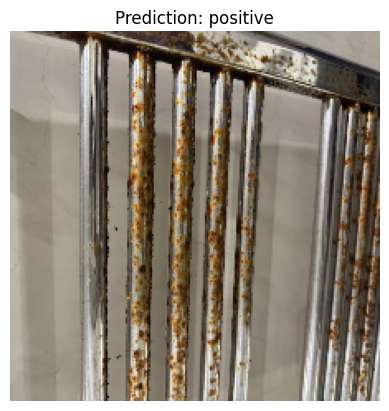

In [55]:
# Test our model on a custom image
pred_and_plot(model_8, "/content/image0 (3).jpeg", class_names)

In [61]:
# Download another test image and make a prediction on it
from google.colab import files
uploaded2 = files.upload()




Saving image0 (6).jpeg to image0 (6).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


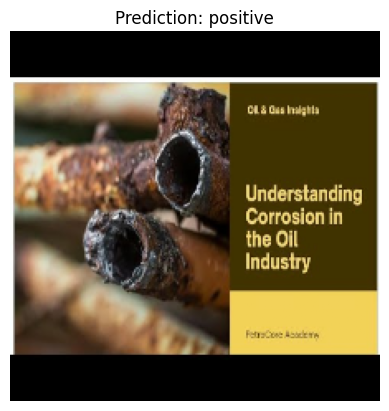

In [62]:
pred_and_plot(model_8, "image0 (6).jpeg", class_names)